In [1]:
import tensorflow as tf
from keras.layers import LocallyConnected2D, Flatten, Dense,Conv2D
from keras.models import Sequential, load_model
from keras.utils import image_dataset_from_directory, plot_model
import matplotlib.pyplot as plt
import numpy as np
import keras

# verify GPU setup
print(tf.config.list_physical_devices("GPU"))

# intialize the model
model = Sequential()

# add layers
model.add(LocallyConnected2D(8,5,(4,4),activation="ReLU",use_bias=True))
model.add(LocallyConnected2D(16,3,(2,2),activation="ReLU",use_bias=True))
model.add(LocallyConnected2D(32,3,(2,2),activation="ReLU",use_bias=True))
model.add(Flatten())
model.add(Dense(((32*12*10)/2), activation="ReLU"))
model.add(Dense(198,activation="softmax"))

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [ ]:
# CNN as comparison
model = Sequential()

model.add(Conv2D(8,3,(4,4), activation="ReLU",use_bias = True))

model.add(Conv2D(16,3,(2,2), activation="ReLU",use_bias = True))
model.add(Conv2D(32,3,(2,2), activation="ReLU",use_bias = True))
model.add(Flatten())
model.add(Dense(((32*12*10)/2), activation="ReLU"))
model.add(Dense(198,activation="softmax"))

In [10]:
# load data
train_set, validation_set = image_dataset_from_directory(
    "C:\Master\Research Internship\DNN_project\Data\img_align_celeba\class_data",
    batch_size=16,
    image_size=(218,178),
    label_mode="categorical",
    seed=True,
    validation_split=0.2,
    subset="both"
)

Found 5003 files belonging to 198 classes.
Using 4003 files for training.
Using 1000 files for validation.


(16, 218, 178, 3)
float32
(16, 198)


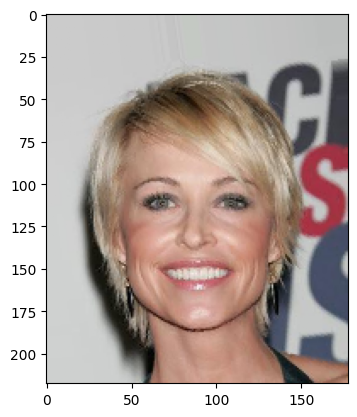

In [11]:
# check the loaded data and labels
for images, labels in train_set:
    print(images.shape)
    print(np.max(images).dtype)
    print(labels.shape)

    plt.imshow(images[0]/255)
    plt.show()
    
    break

In [5]:
# train the model
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss = "categorical_crossentropy",
    metrics=["accuracy"],
)

history = model.fit(train_set,epochs=5, validation_data=validation_set)

Epoch 1/5
251/251 [==============================] - 156s 324ms/step - loss: 5.2491 - accuracy: 0.0077 - val_loss: 5.1398 - val_accuracy: 0.0170
Epoch 2/5
251/251 [==============================] - 42s 165ms/step - loss: 4.9598 - accuracy: 0.0200 - val_loss: 5.0062 - val_accuracy: 0.0230
Epoch 3/5
251/251 [==============================] - 43s 171ms/step - loss: 4.6005 - accuracy: 0.0465 - val_loss: 4.8285 - val_accuracy: 0.0360
Epoch 4/5
251/251 [==============================] - 46s 184ms/step - loss: 4.2475 - accuracy: 0.0809 - val_loss: 4.7252 - val_accuracy: 0.0470
Epoch 5/5
251/251 [==============================] - 44s 173ms/step - loss: 3.8773 - accuracy: 0.1217 - val_loss: 4.7447 - val_accuracy: 0.0670


In [15]:
#extend training 
history = model.fit(train_set,epochs=1, validation_data=train_set)
model.summary()

251/251 [==============================] - 64s 253ms/step - loss: 0.1955 - accuracy: 0.9425 - val_loss: 1.6201 - val_accuracy: 0.7260
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 locally_connected2d_3 (Loca  (None, 54, 44, 8)        532224    
 llyConnected2D)                                                 
                                                                 
 locally_connected2d_4 (Loca  (None, 26, 21, 16)       637728    
 llyConnected2D)                                                 
                                                                 
 locally_connected2d_5 (Loca  (None, 12, 10, 32)       556800    
 llyConnected2D)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 3840)              0         
                                                    

In [8]:
# save trained model
model.save('./model_keras/1_keras_FCN_test200.h5')

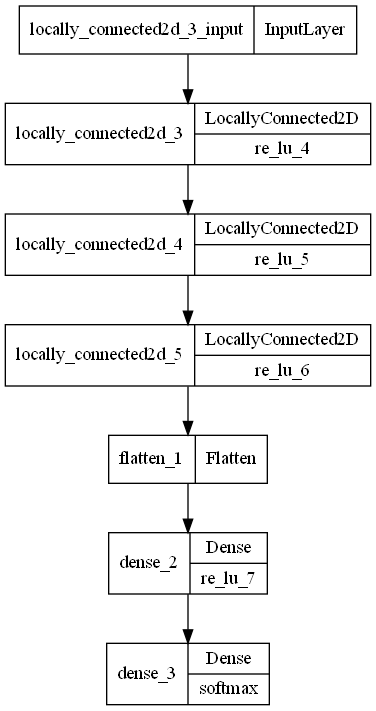

In [2]:
# load an existing model
model = load_model("./model_keras/1_keras_FCN_test200.h5")

# plot model features
plot_model(model, "1_FCN_keras.png",
           show_layer_activations=True)

In [16]:
# save weights
model.summary()
print(model.evaluate(train_set))
model.save_weights("./model_keras/weights.h5")

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 locally_connected2d_3 (Loca  (None, 54, 44, 8)        532224    
 llyConnected2D)                                                 
                                                                 
 locally_connected2d_4 (Loca  (None, 26, 21, 16)       637728    
 llyConnected2D)                                                 
                                                                 
 locally_connected2d_5 (Loca  (None, 12, 10, 32)       556800    
 llyConnected2D)                                                 
                                                                 
 flatten_1 (Flatten)         (None, 3840)              0         
                                                                 
 dense_2 (Dense)             (None, 1920)              7374720   
                                                      